In this notebook, I handled the job scheduling problem. We have one machine and some jobs which have a given processing time. All jobs have sequence-dependent setup times to each other. Besides, all jobs or some jobs have a due date. There may be some objectives in this problem. One is the total tardiness, which minimizes the total amount of time deviated from due dates, while the other is to minimize the completion time of the last job. There may be also other objectives. In this problem, I solved the first problem and second problem respectively. You can incorporate into the model some other constraints like precedence constraints and release date constraints. For instance job 10 should not be carried out before a certain date. Or job 6 must be carried out before job 14. Job sequencing problem is a very challenging problem even if it is a small-scale problem. In this notebook, we handled a tiny problem, which is 15 jobs. İf you have more machines, the problem will get harder and harder. Instead of the mathematical model, you can try heuristics for large-scale problems.

In [1]:
import gurobipy as gb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n = 15#number of jobs
PT = {(i): np.random.randint(2,30) for i in range(1,n+1)} #(process time)
DD = {(i): np.random.randint(2,80) for i in range(1,n+1)} #(due date)
A = [(i,j) for i in range(1,n+1) for j in range(1,n+1) if j > i]
B = {(i,j): np.random.randint(1,15) for i in range(1,n+1) for j in range(1,n+1) if j > i}#setup time between job i and job j

In [3]:
#I took every largest setup time between job i and all jobs to determine reasonable big M value
t = 0
m = 0
for i in range(1,n+1):
    for j in range(1,n+1):
        if j > i:
            if B[i,j] > t:
                t = B[i,j]
    m += t
    t = 0

In [4]:
m

170

In [5]:
#reasonable big M value = sum of all processing time + m
M = sum(PT.values())+m

In [6]:
M

403

In [7]:
from gurobipy import Model, GRB, quicksum

In [37]:
mdl = Model("JS")

In [38]:
x = mdl.addVars(A,vtype = GRB.BINARY,name = "x")#if job i is executed before job j, it equals to 1, ow 0
slack = mdl.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "early_production")
surplas = mdl.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "tardiness")
start = mdl.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "start_time")

In [39]:
mdl.setObjective(quicksum(surplas[i] for i in range(1,n+1)), GRB.MINIMIZE)#minimize total tardiness

In [40]:
mdl.addConstrs((start[i]+B[i,j]-start[j] -M*(1-x[i,j])+PT[i]) <= 0 for i,j in A)#either job i is executed before j or job i is executed after j

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (2, 8): <gurobi.Constr *Awaiting Model Upda

In [41]:
mdl.addConstrs((start[j]+B[i,j]-start[i] -M*x[i,j]+PT[j]) <= 0 for i,j in A)#either job i is executed before j or job i is executed after j

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (2, 8): <gurobi.Constr *Awaiting Model Upda

In [42]:
mdl.addConstrs(start[i]+slack[i]-surplas[i]  == DD[i]-PT[i] for i in range(1,n+1))#early production and tardy production 

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>}

In [43]:
mdl.addConstrs(start[i] <= M for i in range(1,n+1))#a resonable upper bound for start times.

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>}

In [44]:
mdl.Params.MIPGAP = 0.05
mdl.Params.MIPFocus = 2
mdl.Params.TimeLimit = 250
mdl.optimize()

Changed value of parameter MIPGAP to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter TimeLimit to 250.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 240 rows, 150 columns and 690 nonzeros
Model fingerprint: 0x15ef361f
Variable types: 45 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+02]
Presolve removed 16 rows and 16 columns
Presolve time: 0.00s
Presolved: 224 rows, 134 columns, 658 nonzeros
Variable types: 29 continuous, 105 integer (105 binary)
Found heuristic solution: objective 1856.0000000
Presolve removed 105 rows and 0 columns
Presolved: 119 rows, 239 columns, 448 non

In [45]:
mdl.printAttr('X')


    Variable            X 
-------------------------
      x[1,2]            1 
      x[1,3]            1 
      x[1,4]            1 
      x[1,5]            1 
      x[1,6]            1 
      x[1,7]            1 
      x[1,9]            1 
     x[1,13]            1 
     x[1,14]            1 
      x[2,3]            1 
      x[2,4]            1 
      x[2,5]            1 
      x[2,6]            1 
      x[2,7]            1 
      x[2,9]            1 
     x[2,13]            1 
      x[5,9]            1 
      x[6,7]            1 
      x[6,9]            1 
     x[6,13]            1 
      x[7,9]            1 
     x[7,13]            1 
      x[8,9]            1 
     x[8,11]            1 
     x[8,13]            1 
     x[8,14]            1 
    x[10,11]            1 
    x[10,13]            1 
    x[10,14]            1 
    x[11,13]            1 
    x[11,14]            1 
    x[12,13]            1 
    x[12,14]            1 
    x[12,15]            1 
early_production[10]        

In [46]:
liste = []
for i in start:
    liste.append((i,round(start[i].x,0)))
print(liste)

[(1, 52.0), (2, 86.0), (3, 255.0), (4, 218.0), (5, 166.0), (6, 105.0), (7, 122.0), (8, 39.0), (9, 187.0), (10, 22.0), (11, 47.0), (12, 0.0), (13, 141.0), (14, 72.0), (15, 9.0)]


In [47]:
def takeSecond(elem):
    return elem[1]
liste.sort(key = takeSecond)
print(liste)

[(12, 0.0), (15, 9.0), (10, 22.0), (8, 39.0), (11, 47.0), (1, 52.0), (14, 72.0), (2, 86.0), (6, 105.0), (7, 122.0), (13, 141.0), (5, 166.0), (9, 187.0), (4, 218.0), (3, 255.0)]


In [48]:
a, b = map(list, zip(*liste))
c = [PT[i] for i in a]
f = [i+j for i,j in zip(b,c)]

In [49]:
başlama = [start[k].x for k in a]

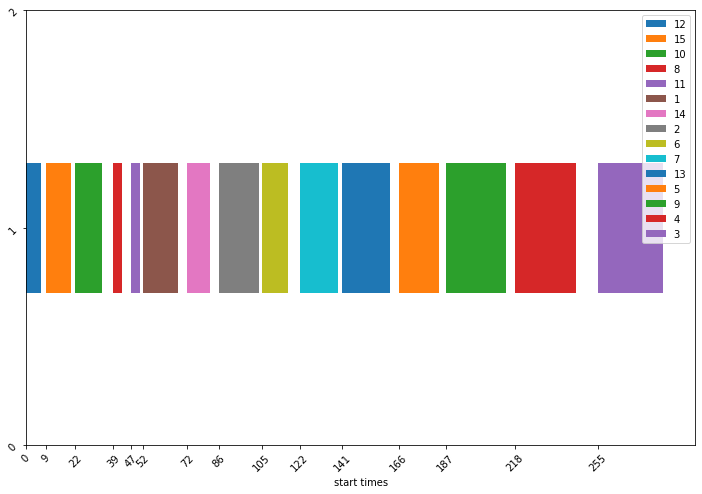

In [50]:
#horizontal, every gap between jobs in the figure is setup times
plt.figure(figsize=(12,8))
for k in range(n):
    plt.barh(1,c[k],left = başlama[k], height = 0.6)
    #plt.xticks(range(1,n+1), a)
    plt.xticks(başlama, rotation = 45)
    plt.yticks(range(0,3), rotation = 45)
    #plt.xticks(rotation = 45)
    plt.xlabel("start times")
    plt.legend(a, loc = "best")

In [51]:
#completion time of all jobs, which means completion time of the last job
print(başlama[-1]+c[-1])

283.99999999999625


In [52]:
mdl1 = Model("JS")#minimize the completion time of the last job

In [53]:
x = mdl1.addVars(A,vtype = GRB.BINARY,name = "x")
Zmax = mdl1.addVar()#for completion time of the last job, nini(max) objective
start = mdl1.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "start")

In [54]:
mdl1.setObjective(Zmax)#minimize the completion time of the last job

In [55]:
mdl1.addConstrs((start[i]+B[i,j]-start[j] -M*(1-x[i,j])+PT[i]) <= 0 for i,j in A)

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (2, 8): <gurobi.Constr *Awaiting Model Upda

In [56]:
mdl1.addConstrs((start[j]+B[i,j]-start[i] -M*x[i,j]+PT[j]) <= 0 for i,j in A)

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (2, 8): <gurobi.Constr *Awaiting Model Upda

In [57]:
mdl1.addConstrs(Zmax >= start[i] + PT[i] for i in range(1,n+1))#zmax must be greater or equal than start time plus process time of every job

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>}

In [58]:
mdl1.addConstrs(start[i] <= M for i in range(1,n+1))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>}

In [59]:
mdl1.Params.MIPGAP = 0.05
mdl1.Params.MIPFocus = 2
mdl1.Params.TimeLimit = 250
mdl1.optimize()

Changed value of parameter MIPGAP to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter TimeLimit to 250.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 240 rows, 121 columns and 675 nonzeros
Model fingerprint: 0x1c457378
Variable types: 16 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+00, 4e+02]
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 225 rows, 121 columns, 660 nonzeros
Variable types: 16 continuous, 105 integer (105 binary)
Found heuristic solution: objective 343.0000000
Presolve removed 105 rows and 0 columns
Presolved: 120 rows, 226 columns, 450 nonze

  StrongCG: 2
  Flow cover: 889
  Inf proof: 525
  RLT: 5
  Relax-and-lift: 5

Explored 230112 nodes (14976155 simplex iterations) in 250.03 seconds
Thread count was 8 (of 8 available processors)

Solution count 10: 273 274 280 ... 299

Time limit reached
Best objective 2.729999999726e+02, best bound 2.214533705012e+02, gap 18.8815%


In [60]:
liste = []
for i in start:
    liste.append((i,round(start[i].x,0)))
print(liste)

[(1, 155.0), (2, 189.0), (3, 209.0), (4, 16.0), (5, 136.0), (6, 76.0), (7, 116.0), (8, 9.0), (9, 47.0), (10, 261.0), (11, 0.0), (12, 239.0), (13, 93.0), (14, 175.0), (15, 248.0)]


In [61]:
def takeSecond(elem):
    return elem[1]
liste.sort(key = takeSecond)
print(liste)

[(11, 0.0), (8, 9.0), (4, 16.0), (9, 47.0), (6, 76.0), (13, 93.0), (7, 116.0), (5, 136.0), (1, 155.0), (14, 175.0), (2, 189.0), (3, 209.0), (12, 239.0), (15, 248.0), (10, 261.0)]


In [62]:
a, b = map(list, zip(*liste))
c = [PT[i] for i in a]
f = [i+j for i,j in zip(b,c)]

In [63]:
başlama = [start[k].x for k in a]

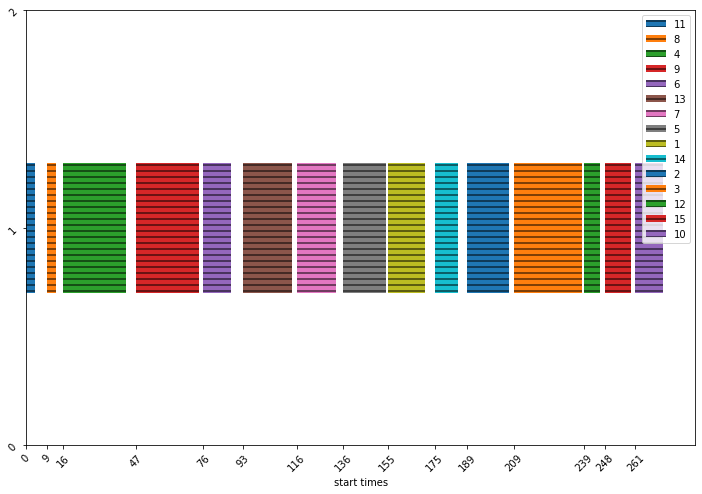

In [64]:
#horizontal, every gap between jobs in the figure is setup times
plt.figure(figsize=(12,8))
for k in range(n):
    plt.barh(1,c[k],left = başlama[k], height = 0.6,hatch = "--")
    #plt.xticks(range(1,n+1), a)
    plt.xticks(başlama, rotation = 45)
    plt.yticks(range(0,3), rotation = 45)
    #plt.xticks(rotation = 45)
    plt.xlabel("start times")
    plt.legend(a, loc = "best")